In [1]:
#import sys
#%pip install pyAgrum==0.22.2
#%pip install cairosvg

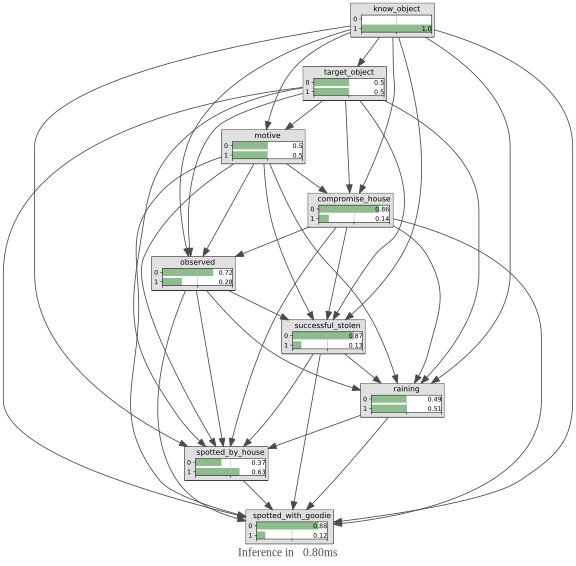

In [64]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.image as gim

bn1=gum.loadBN("BayesNets/GodBN.net")
bn1
ie=gum.LazyPropagation(bn1)
gnb.showInference(bn1,evs={})
gim.exportInference(bn1, "BayesNets/GodsEye.pdf", evs={})

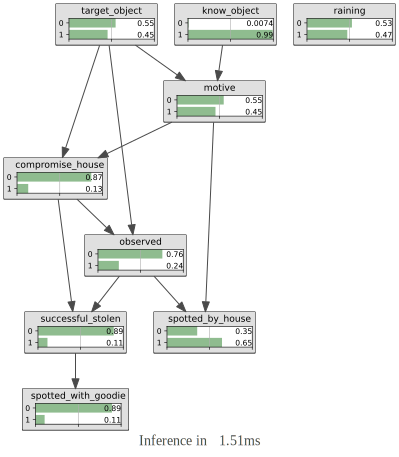

In [78]:
bnK2=gum.loadBN("BayesNets/K2BN.net")
ie=gum.LazyPropagation(bnK2)
gnb.showInference(bnK2,evs={})
gim.exportInference(bnK2, "BayesNets/K2BN.pdf", evs={})

In [79]:
bnK2.cpt("spotted_with_goodie")

(pyAgrum.Potential<double>@0x7fd4c7ab9170) 
      ||  spotted_with_good|
succes||0        |1        |
------||---------|---------|
0     || 0.9986  | 0.0014  |
1     || 0.0556  | 0.9444  |

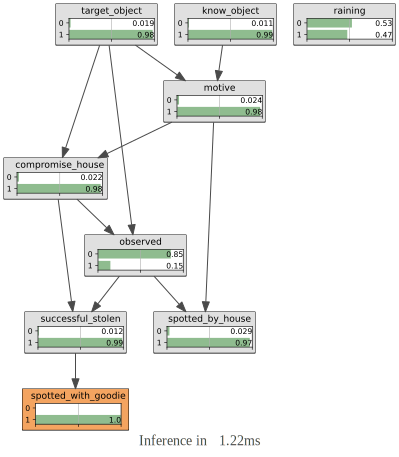

In [80]:
gnb.showInference(bnK2,evs={"spotted_with_goodie": 1})

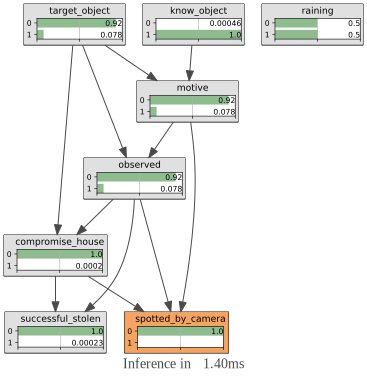

In [62]:
gnb.showInference(bnK2,evs={"spotted_by_house":1, "spotted_with_goodie": 1})

In [34]:
bn2=gum.loadBN("BayesNets/CommonBN.net")
bn2
ie=gum.LazyPropagation(bn2)
gnb.showInference(bn2,evs={})
gim.exportInference(bn2, "BayesNets/Common.pdf", evs={})

Exception: [pyAgrum] Several evidence/CPT are incompatible together (proba=0): some evidence entered into the Bayes net are incompatible (their joint proba = 0)

In [3]:
bn1.cpt('observed')

(pyAgrum.Potential<double>@0x7fbde378daa0) 
                           ||  observed         |
compro|motive|target|know_o||0        |1        |
------|------|------|------||---------|---------|
0     |0     |0     |0     || 1.0000  | 0.0000  |
1     |0     |0     |0     || 1.0000  | 0.0000  |
0     |1     |0     |0     || 1.0000  | 0.0000  |
1     |1     |0     |0     || 1.0000  | 0.0000  |
0     |0     |1     |0     || 1.0000  | 0.0000  |
1     |0     |1     |0     || 1.0000  | 0.0000  |
[...4 more line(s) ...]
0     |1     |0     |1     || 1.0000  | 0.0000  |
1     |1     |0     |1     || 1.0000  | 0.0000  |
0     |0     |1     |1     || 1.0000  | 0.0000  |
1     |0     |1     |1     || 1.0000  | 0.0000  |
0     |1     |1     |1     || 0.3440  | 0.6560  |
1     |1     |1     |1     || 0.7138  | 0.2862  |

In [4]:
bn2.cpt('observed')

(pyAgrum.Potential<double>@0x7fbde4be1240) 
                           ||  observed         |
compro|motive|target|know_o||0        |1        |
------|------|------|------||---------|---------|
0     |0     |0     |0     || 1.0000  | 0.0000  |
1     |0     |0     |0     || 1.0000  | 0.0000  |
0     |1     |0     |0     || 1.0000  | 0.0000  |
1     |1     |0     |0     || 1.0000  | 0.0000  |
0     |0     |1     |0     || 1.0000  | 0.0000  |
1     |0     |1     |0     || 1.0000  | 0.0000  |
[...4 more line(s) ...]
0     |1     |0     |1     || 1.0000  | 0.0000  |
1     |1     |0     |1     || 1.0000  | 0.0000  |
0     |0     |1     |1     || 1.0000  | 0.0000  |
1     |0     |1     |1     || 1.0000  | 0.0000  |
0     |1     |1     |1     || 1.0000  | 0.0000  |
1     |1     |1     |1     || 0.9000  | 0.1000  |

In [26]:
bn3.cpt('target_object')

(pyAgrum.Potential<double>@0x7fde06da7c00) 
      ||  target_object    |
know_o||0        |1        |
------||---------|---------|
0     || 0.0000  | 0.0000  |
1     || 0.5000  | 0.5000  |

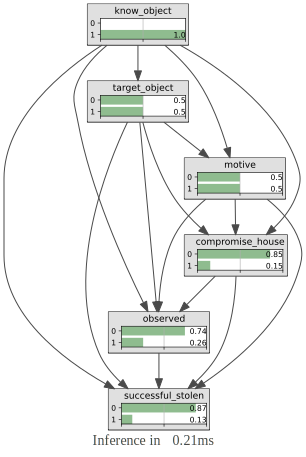

In [25]:
bn3=gum.loadBN("BayesNets/RoundedBN.net")
ie=gum.LazyPropagation(bn3)
gnb.showInference(bn3,evs={})
gim.exportInference(bn3, "BayesNets/Rounded.pdf", evs={})

In [2]:
import pyAgrum.lib.explain as explain



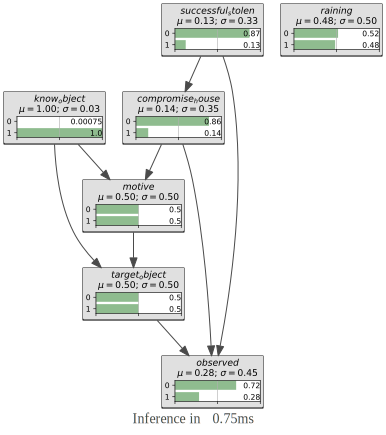

In [29]:
learner=gum.BNLearner("globalStates.csv") #using bn as template for variables and labels
bn_learned=learner.learnBN()
#gnb.showBN(bn_learned)
ie=gum.LazyPropagation(bn_learned)
gnb.showInference(bn_learned,evs={})

Filename       : globalStates.csv
Size           : (2001,7)
Variables      : know_object[2], target_object[2], motive[2], compromise_house[2], observed[2], successful_stolen[2], raining[2]
Induced types  : True
Missing values : False
Algorithm      : Local Search with Tabu List
Tabu list size : 2
Score          : BDeu
Prior          : -



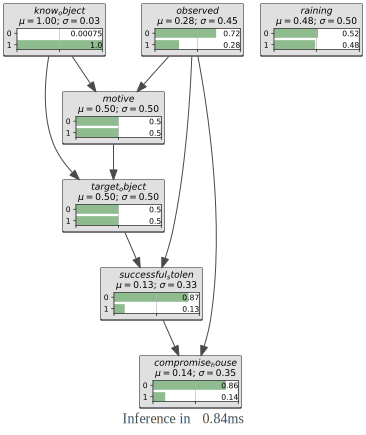

In [30]:
learner=gum.BNLearner("globalStates.csv") #using bn as template for variables and labels
learner.useLocalSearchWithTabuList()
print(learner)
bn_learned2=learner.learnBN()
ie=gum.LazyPropagation(bn_learned2)
gnb.showInference(bn_learned2,evs={})

Filename       : globalStates.csv
Size           : (2001,7)
Variables      : know_object[2], target_object[2], motive[2], compromise_house[2], observed[2], successful_stolen[2], raining[2]
Induced types  : True
Missing values : False
Algorithm      : Greedy Hill Climbing
Score          : BDeu
Prior          : -



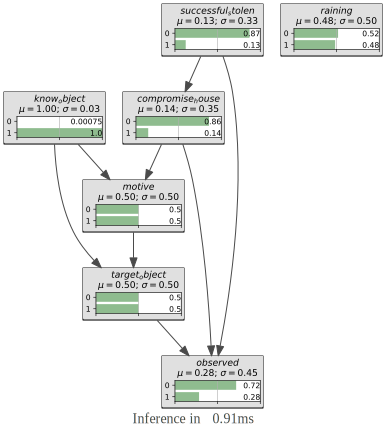

In [31]:
learner=gum.BNLearner("globalStates.csv") #using bn as template for variables and labels
learner.useGreedyHillClimbing()
print(learner)
bn_learned2=learner.learnBN()
ie=gum.LazyPropagation(bn_learned2)
gnb.showInference(bn_learned2,evs={})

In [11]:
gnb.sideBySide(bn_learned,bn_learned2)


Filename       : globalStates.csv
Size           : (2001,6)
Variables      : know_object[2], target_object[2], motive[2], compromise_house[2], observed[2], successful_stolen[2]
Induced types  : True
Missing values : False
Algorithm      : K2
K2 order       : know_object, target_object, motive, compromise_house, observed, successful_stolen
Score          : BDeu
Prior          : -



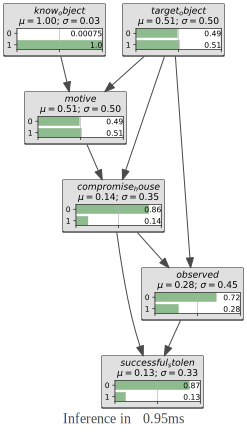

In [13]:
learner=gum.BNLearner("globalStates.csv") #using bn as template for variables and labels
learner.useK2([0, 1, 2, 3, 4, 5])
print(learner)
bn_learnedK2=learner.learnBN()
ie=gum.LazyPropagation(bn_learnedK2)
gnb.showInference(bn_learnedK2,evs={})

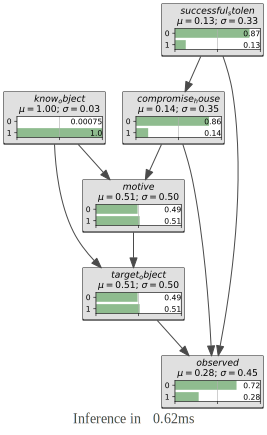

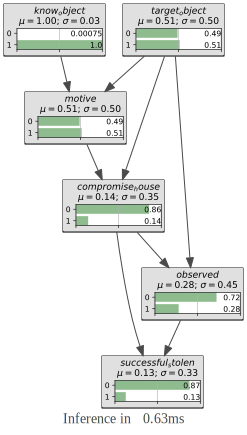

None,None


In [19]:
gnb.sideBySide(bn1, bn_learnedK2, gnb.getBNDiff(bn1, bn_learnedK2))

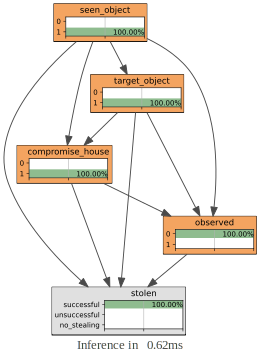

In [2]:
gnb.showInference(bn,evs={'observed':0, 'compromise_house': 1,
                          'target_object': 1, "seen_object": 1})


In [30]:
bn=gum.loadBN("Test.net")

bn2 = bn

In [31]:
bn2.eraseArc("seen_object", "target_object")
gnb.showInference(bn,evs={})


Exception: [pyAgrum] Several evidence/CPT are incompatible together (proba=0): some evidence entered into the Bayes net are incompatible (their joint proba = 0)

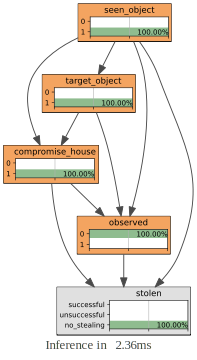

In [18]:
gnb.showInference(bn2,evs={'observed':0, 'compromise_house': 1,
                          'target_object': 1, "seen_object": 1})